## Project Title: Walmart store sales forecasting and holiday impact analysis

**Project Objective:**
To predict weekly sales at the department level for each Walmart store, while understanding and modeling the impact of holidays and markdown promotions on sales. The ultimate goal is to provide an accurate forecast model that helps Walmart optimize inventory, staffing, and promotions—especially during high-impact holiday periods

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# import datasets
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
store_df = pd.read_csv('stores.csv')

print('Train Dataset:')
display(train_df.head())
print('features Dataset:')
display(features_df.head())
print('Store Dataset:')
display(store_df.head())

Train Dataset:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


features Dataset:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Store Dataset:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
print(train_df.shape)
print(features_df.shape)
print(store_df.shape)

(421570, 5)
(8190, 12)
(45, 3)


**Store:** The store number

**Dept:** The Department number

**Date:** The week

**Weekly Sales:** The weekly sales for the given department in the given store

**Isholiday:** whether the week is a special holiday week

**Temperature:** Average Temperature in the region

**Fuel_price:** Cost of fuel in the region

**MarkDown1-5** - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

**CPI:** Consumer Price Index

**Unemployment**: Unemployment rate

-13


For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):


Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13


Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13


Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13


Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

## Exploratory Data Analysis (EDA) and Data Visualization

In [7]:
# merge train dataset and features dataset

df_1 = pd.merge(train_df, features_df, how = 'left', on = ['Store', 'Date']).drop('IsHoliday_y', axis = 1)
df_1.rename(columns = {'IsHoliday_x': 'IsHoliday'}, inplace = True)

In [8]:
df_1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [9]:
# Now merge df_1 dataset with the store dataset
df = pd.merge(df_1, store_df, on = 'Store', how = 'left')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


Now we will be futher working on this dataset `df`

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [26]:
# changing date column into datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df['IsHoliday'] = df['IsHoliday'].astype('int')

In [13]:
df.isnull().sum() / len(df) * 100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

we can see that on the average there is 67% missing values in Markdown columns. Since, dropping these values would not be appropriate because if we drop null values we will be dropping 67% dataset. Since, markdown columns simply represents the promotions of different kinds so if there any missing values that is represented by `NA` it simply means that no promotion was applied on that week. So we can simply replace `null` values with `0`

In [42]:
df['MarkDown1'] = df['MarkDown1'].fillna(0)
df['MarkDown2'] = df['MarkDown2'].fillna(0)
df['MarkDown3'] = df['MarkDown3'].fillna(0)
df['MarkDown4'] = df['MarkDown4'].fillna(0)
df['MarkDown5'] = df['MarkDown5'].fillna(0)

In [44]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

There are no null values now and all of the null values have been replaced with 0

In [47]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [49]:
# Extract Year
df['year'] = df['Date'].dt.year

In [53]:
# Extract week number
df['week'] = df['Date'].dt.isocalendar().week

In [79]:
dummies = pd.get_dummies(df['Type'], prefix = 'Type', dtype = 'int')
df = pd.concat([df, dummies],axis = 1)

In [128]:
df.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,year,week,Type_A,Type_B,Type_C
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,2010.968591,25.826762,0.511132,0.387824,0.101044
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,2010.000000,1.0,0.000000,0.000000,0.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,2010.000000,14.0,0.000000,0.000000,0.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,2011.000000,26.0,1.000000,0.000000,0.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,2012.000000,38.0,1.000000,1.000000,0.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000,52.0,1.000000,1.000000,1.000000
std,12.785297,30.492054,NaN,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,0.796876,14.151887,0.499877,0.487255,0.301387


There are some anomalies in the data because weekly sales can't be negative and the minimum value is negative and similarly in markdown column we see negative value. We will check these anomalies (outliers) by constructing boxplots

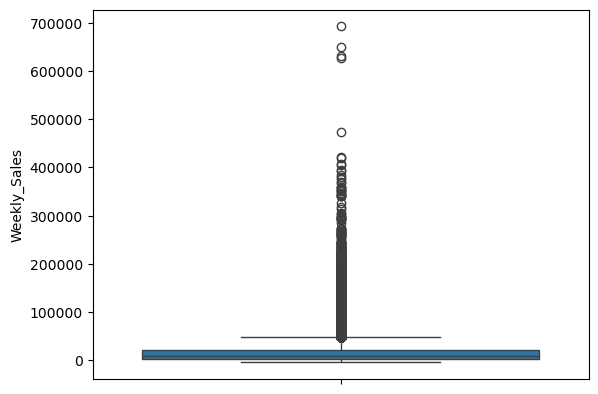

In [131]:
sns.boxplot(df['Weekly_Sales'])
plt.show()

we see so many outliers in our column weekly sales but if we think critically then we should not remove these outliers because they are actual weekly sales and the negative value that was minimum is not an anomaly otherwise it would have been shown below the lower quantile.

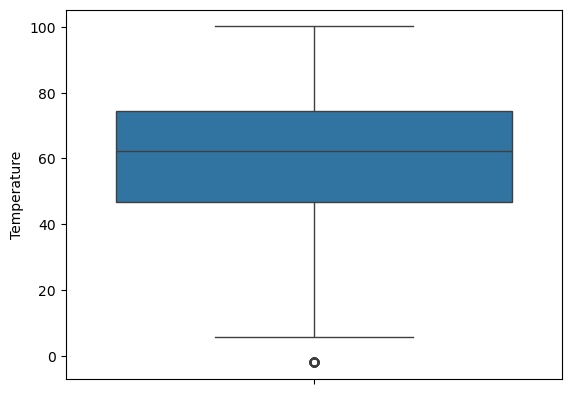

In [134]:
sns.boxplot(df['Temperature'])
plt.show()

we can see outliers in `Temperature` feature and replacing them with lower bound value would be appropriate here

In [144]:
q1 = df['Temperature'].quantile(0.25)
q3 = df['Temperature'].quantile(0.75)

IQR = q3 - q1
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

df['Temperature'] = np.where(df['Temperature'] < lower_bound, lower_bound,
                           np.where(df['Temperature'] > upper_bound, upper_bound, df['Temperature']))

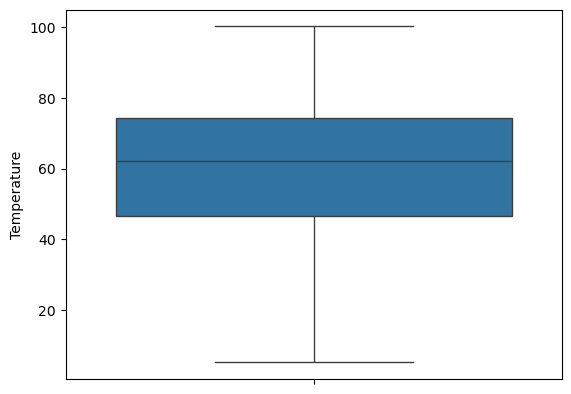

In [148]:
sns.boxplot(df['Temperature'])
plt.show()

Outliers have been replaced

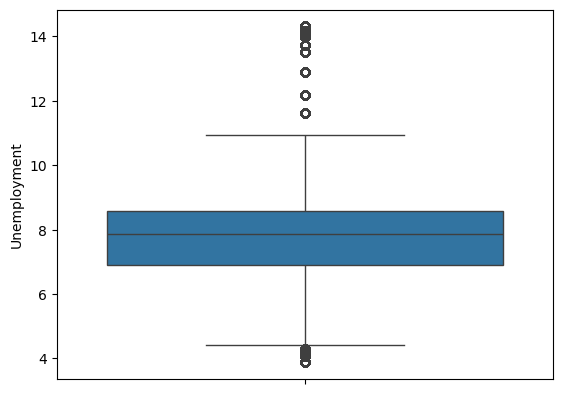

In [161]:
sns.boxplot(df['Unemployment'])
plt.show()

Let's fix outliers in `Unemployment` feature

In [169]:
q1 = df['Unemployment'].quantile(0.25)
q3 = df['Unemployment'].quantile(0.75)

IQR = q3 - q1
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# replace outliers with lower bound and upper bound values
df['Unemployment'] = np.where(df['Unemployment'] < lower_bound, lower_bound,
                           np.where(df['Unemployment'] > upper_bound, upper_bound, df['Unemployment']))

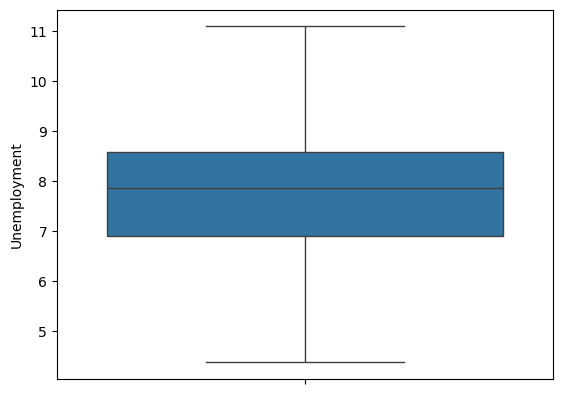

In [166]:
sns.boxplot(df['Unemployment'])
plt.show()

All Outliers have been fixed. Let's move further...

Let's have a look at the distribution of features. Why it is important? Because whenever we try to build a regression model then there is assumption of normality of the features and the features should not be much skewed.

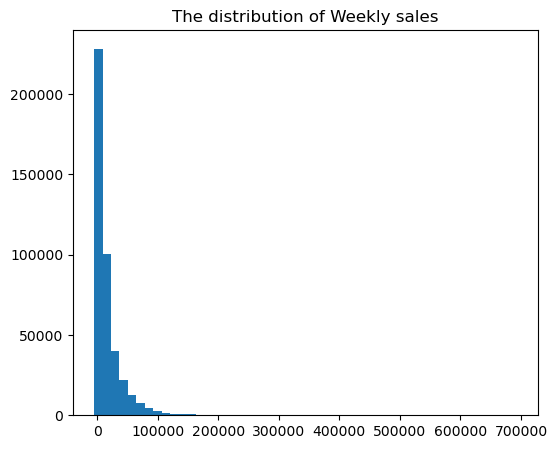

In [254]:
plt.figure(figsize = (6,5))
plt.hist(df['Weekly_Sales'], bins = 50)
plt.title('The distribution of Weekly sales')
plt.show()

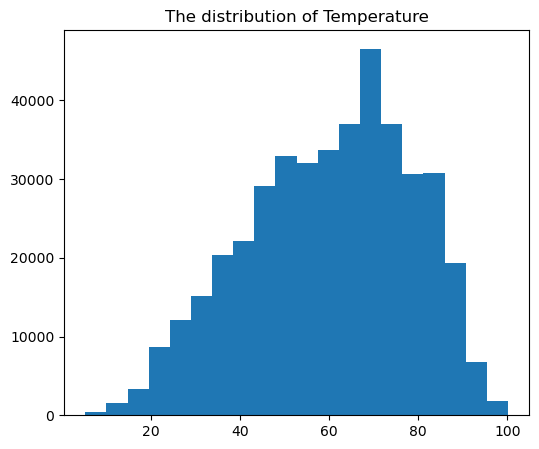

In [193]:
plt.figure(figsize = (6,5))
plt.hist(df['Temperature'], bins = 20)
plt.title('The distribution of Temperature')
plt.show()

The distribution of feature `Temperature` doesn't seem much skewed and can work perfectly fine.

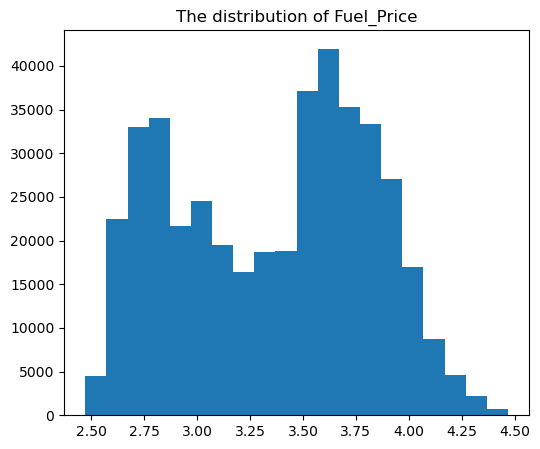

In [198]:
plt.figure(figsize = (6,5))
plt.hist(df['Fuel_Price'], bins = 20)
plt.title('The distribution of Fuel_Price')
plt.show()

The distribution is not highly skewed and can work perfectly fine.

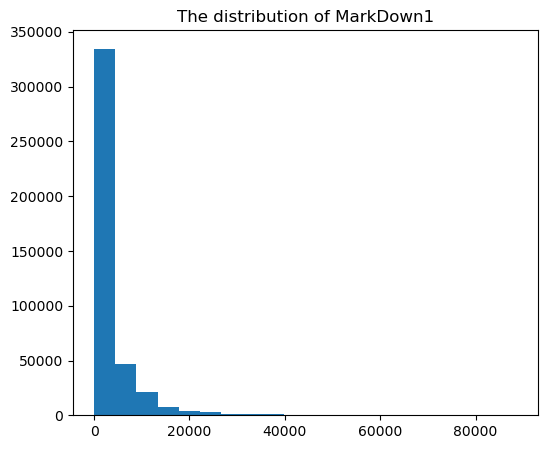

In [221]:
plt.figure(figsize = (6,5))
plt.hist(df['MarkDown1'], bins = 20)
plt.title('The distribution of MarkDown1')
plt.show()

Distribution of Markdown 1 is postive-skewed and we might transform this variable when we will start doing feature engineering

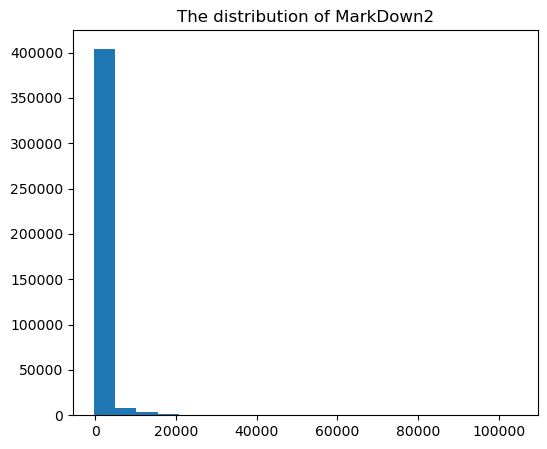

In [229]:
plt.figure(figsize = (6,5))
plt.hist(df['MarkDown2'], bins = 20)
plt.title('The distribution of MarkDown2')
plt.show()

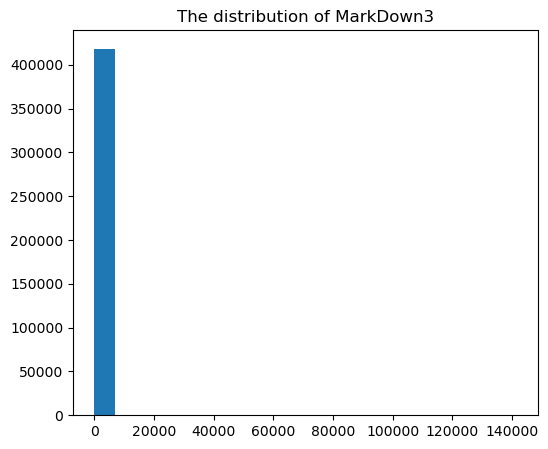

In [231]:
plt.figure(figsize = (6,5))
plt.hist(df['MarkDown3'], bins = 20)
plt.title('The distribution of MarkDown3')
plt.show()

In [235]:
df['MarkDown3'].value_counts()

MarkDown3
0.00     284546
3.00        754
6.00        710
2.00        660
1.00        611
          ...  
12.17        45
0.76         45
26.26        44
7.04         44
2.62         43
Name: count, Length: 1662, dtype: int64

Most of the values in the markdown3 feature are zeros and it might not contribute to the model significantly so dropping this variable might be suitable but we will keep it for now to see if it contributes to anything else

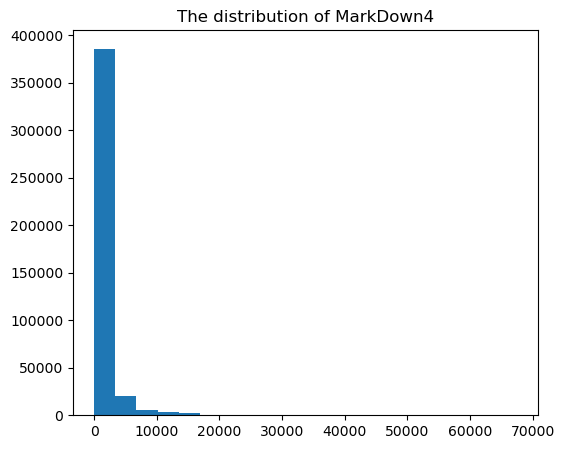

In [240]:
plt.figure(figsize = (6,5))
plt.hist(df['MarkDown4'], bins = 20)
plt.title('The distribution of MarkDown4')
plt.show()

The remaining features almost have less skewed distributions so that's why I did not include their graphs. Distributions of those features can be checked similarly as I did above.

EDA has been completed so far. Missing values have been handled precisely and anomalies also have been detected and have been fixed and we also have fixed outliers and the distributions of features also have been seen.

Let's move further in analysis and explore some trends and patterns in data.

___

In [259]:
df.to_excel('cleaned_df.xlsx')